# **팀 프로젝트 이커머스 기업 데이터 분석**

### 데이터 스키마
<left><img src=".\Brazilian E-commerce_Data_Schema.png" width="75%" height="75%"></left>  

## 1. EDA
orders 데이터 탐색

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta, time

In [2]:
# 데이터 불러오기
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')
products_eng = pd.read_csv('product_category_name_translation.csv')


In [3]:
# 데이터 확인
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# orders 행/열 개수 확인
orders.shape

(99441, 8)

In [5]:
# orders 기본 정보 확인
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
# orders에 있는 null 값 확인
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
# products 테이블 데이터 확인
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# 영문 테이블 데이터 확인
products_eng.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# 기존 테이블의 product_category_name 열을 products_eng의 product_category_name_english로 변경
product = products['product_category_name'].tolist()
name = products_eng['product_category_name'].tolist()
eng_name = products_eng['product_category_name_english'].tolist()

for i in product:
    if i in name:
        product[product.index(i)] = eng_name[name.index(i)]


In [10]:
# 제대로 바뀌었나 확인
products['product_category_name'] = product
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# 제대로 바뀌었나 확인
products['product_category_name'] = product
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# 기존 데이터를 영어 카테고리명으로 바꾼 데이터로 덮어쓰기
products.to_csv('olist_products_dataset.csv', index=False)

In [13]:
# null값 확인
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [14]:
# 관련 데이터 전부 합치기
df = orders.merge(customers, on = 'customer_id', how = 'outer')
df = df.merge(items, on = 'order_id', how = 'outer')
df = df.merge(payments, on = 'order_id', how = 'outer')
df = df.merge(review, on = 'order_id', how = 'outer')
df = df.merge(products, on = 'product_id', how = 'outer')

In [15]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [16]:
# 날짜 관련 데이터의 데이터 타입을 연산하기 편하게 datetime으로 변환
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])


In [17]:
# 제대로 변환된 거 확인 가능
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

In [18]:
# 필요 없는 컬럼 삭제
df.drop(['review_id', 'review_creation_date', 'review_answer_timestamp'], axis = 1, inplace = True)
df.columns 

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_title', 'review_comment_message',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [19]:
# review_score의 널값은 0으로 처리
df.review_score.fillna(0, inplace = True)
df.review_score.value_counts()

5.0    66343
4.0    22319
1.0    15428
3.0     9894
2.0     4162
0.0      997
Name: review_score, dtype: int64

In [20]:
df.dropna(subset = ['order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_type', 
                    'payment_installments', 'payment_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace = True)
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1215
order_delivered_customer_date      2517
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_score                          0
review_comment_title             102787
review_comment_message            67679


In [21]:
# 최종 데이터프레임 추출
df.to_csv('merged_data.csv')

## 2. 데이터 분석
RFM 고객 세그먼테이션이란?  
고객별로 얼마나 최근에(Recency), 얼마나 자주(Frequency), 얼마나 많은 금액(Monetary)을 지출했는지에 따라 고객의 가치를 분석하고 고객 등급을 나누는 분석 기법

In [22]:
# 앞서 합친 데이터 불러오기
rfm = pd.read_csv('merged_data.csv')
rfm.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,review_comment_title,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,NaN,"Não testei o produto ainda, mas ele veio corre...",housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,NaN,"Não testei o produto ainda, mas ele veio corre...",housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,NaN,"Não testei o produto ainda, mas ele veio corre...",housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,...,NaN,Deveriam embalar melhor o produto. A caixa vei...,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,...,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0


In [23]:
# datetime으로 형식 바꾸기
rfm['order_purchase_timestamp'] = pd.to_datetime(rfm['order_purchase_timestamp'])
rfm['order_approved_at'] = pd.to_datetime(rfm['order_approved_at'])
rfm['order_delivered_carrier_date'] = pd.to_datetime(rfm['order_delivered_carrier_date'])
rfm['order_delivered_customer_date'] = pd.to_datetime(rfm['order_delivered_customer_date'])
rfm['order_estimated_delivery_date'] = pd.to_datetime(rfm['order_estimated_delivery_date'])
rfm['shipping_limit_date'] = pd.to_datetime(rfm['shipping_limit_date'])

### R (recency)
'고객이 최근에 구매했는가?'
고객의 마지막 활동이 언제인지 나타내는 변수로, 최근에 구매한 고객일수록 높은 점수가 부여된다.

In [24]:
# 고객별로 가장 최근 구매 날짜 구하기
recency = rfm.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency.rename(columns={'order_purchase_timestamp':'recency'}, inplace=True)
recency.head()

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [25]:
# 데이터 상 가장 최근 데이터에서 고객별 가장 최근 구매 날짜 간 차이 구하기
max_date = recency['recency'].max()
recency['diff_date'] = (max_date - recency['recency']).dt.days # dt.days : 시간 없이 날짜만 남기기
recency.head()

,customer_unique_id,recency,diff_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [26]:
# 날짜 간 차이에 따라 점수 부여
# pd.cut() : 같은 길이로 구간 나누기
# pd.qcut() : 같은 개수로 구간 나누기
r_bins = pd.qcut(recency['diff_date'], 5, labels = [5, 4, 3, 2, 1])
recency['r_score'] = r_bins
recency.head()

,customer_unique_id,recency,diff_date,r_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,2
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2


In [27]:
recency.r_score.value_counts()

3    18955
5    18831
4    18817
2    18755
1    18748
Name: r_score, dtype: int64

### F (frequency)
'고객이 얼마나 자주 구매했는가?'
일정 기간 동안 고객이 얼마나 자주 구매했는지를 나타내는 변수로, 자주 구매한 고객일수록 높은 점수가 부여된다.


In [28]:
# customer_unique_id와 order_purchase_timestamp 컬럼 사용
# customer_unique_id는 고객 고유의 값인데, 첫 행을 보면 고객 아이디와 timestamp가 3개가 동일
# 장바구니에 3개를 담았다가 결제를 했을 때 하나로 기록되는 게 아니라 3개 결제로 기록되는 것 같다 -> nunique로 연산해야 함
rfm[['customer_unique_id', 'order_purchase_timestamp']]

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
3,3a51803cc0d012c3b5dc8b7528cb05f7,2017-08-15 18:29:31
4,ef0996a1a279c26e7ecbd737be23d235,2017-08-02 18:24:47
...,...,...
116592,fb9310710003399b031add3e55f34719,2017-08-10 21:21:07
116593,fb9310710003399b031add3e55f34719,2017-08-10 21:21:07
116594,a49e8e11e850592fe685ae3c64b40eca,2017-12-20 09:52:41
116595,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05


In [29]:
# 고객별 구매 횟수 구하기 - nunique
frequency = rfm.groupby('customer_unique_id')['order_purchase_timestamp'].nunique().reset_index()
frequency.rename(columns={'order_purchase_timestamp':'frequency'}, inplace=True)
frequency.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [30]:
# frequency는 1, 2회가 너무 많아서 pd.qcut 적용 불가
frequency.frequency.value_counts()

1     91501
2      2401
3       159
4        30
5         8
7         3
6         2
9         1
15        1
Name: frequency, dtype: int64

In [31]:
# 1회는 1점, 2회는 2점, 3회는 3점, 4회는 4점, 나머지는 5점으로 처리하는 함수
def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

In [32]:
# f_score 열에 parse_values 함수 적용
frequency['f_score'] = frequency['frequency'].apply(parse_values)
frequency.head()

,customer_unique_id,frequency,f_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1


### M (monetary)
'고객이 얼마나 구매했나?'
일정 기간 동안 고객이 구매한 총 금액을 의미하는 변수로, 구매 금액이 높은 고객일수록 높은 점수가 부여된다.


In [33]:
# 고객별 구매 금액 구하기
# 고객 식별값인 customer_unique_id별로 지금까지 구매한 payment_value의 총합을 monetary 칼럼으로 구함

monetary = rfm.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary.rename(columns={'payment_value': 'monetary'}, inplace=True)
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [34]:
# 구매 금액 별 점수 나누기
# qcut 함수로 각 customer_unique_id의 monetary를 5개 등급으로 분류.
# monetary가 가장 높은 등급(5점)부터 가장 낮은 등급(1점)까지 m_score를 부여.
m_bins = pd.qcut(monetary['monetary'], 5, labels = [1, 2, 3, 4, 5])
monetary['m_score'] = m_bins
monetary.head()

,customer_unique_id,monetary,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,0000f46a3911fa3c0805444483337064,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,196.89,4


In [35]:
# 등급 분류 확인
monetary.m_score.value_counts()

2    18831
1    18824
4    18822
5    18820
3    18809
Name: m_score, dtype: int64

In [36]:
# recency, frequency, monetary 데이터프레임 하나로 합치기
rfm_score = recency.merge(frequency, on = 'customer_unique_id')
rfm_score = rfm_score.merge(monetary, on = 'customer_unique_id')
rfm_score.head()

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,4,1,1,141.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4,1,1,27.19,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,2,1,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,4


In [37]:
# rfm_score을 합치기 위해 string으로 형 변환
rfm_score['r_score'] = rfm_score['r_score'].astype(str)
rfm_score['f_score'] = rfm_score['f_score'].astype(str)
rfm_score['m_score'] = rfm_score['m_score'].astype(str)
rfm_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94106 entries, 0 to 94105
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  94106 non-null  object        
 1   recency             94106 non-null  datetime64[ns]
 2   diff_date           94106 non-null  int64         
 3   r_score             94106 non-null  object        
 4   frequency           94106 non-null  int64         
 5   f_score             94106 non-null  object        
 6   monetary            94106 non-null  float64       
 7   m_score             94106 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [38]:
# rfm_score 합치기
rfm_score['rfm_score'] = rfm_score['r_score'] + rfm_score['f_score'] + rfm_score['m_score']
rfm_score.head()

,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,4,1,1,141.90,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4,1,1,27.19,1,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,2,1,1,43.62,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,4,214


In [39]:
# rfm_score을 바탕으로 RFM 고객 세그먼테이션 적용
segments = {
    r'111|112|121|131|141|151': '이탈 고객',
    r'332|322|233|232|223|222|132|123|122|212|211': '동면 고객', 
    r'155|154|144|214|215|115|114|113': '놓치면 안 될 고객',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': '이탈 우려 고객',
    r'331|321|312|221|213|231|241|251': '휴면 예정 고객',
    r'535|534|443|434|343|334|325|324': '관심 필요 고객',
    r'525|524|523|515|514|513|425|424|413|414|415|315|314|313': '잠재 고객',
    r'522|521|512|511|422|421|412|411|311': '신규 고객',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': '잠재 충성 고객',
    r'543|444|435|355|354|345|344|335': '충성 고객',
    r'555|554|544|545|454|455|445': 'VIP 고객'
}

rfm_score['segment'] = rfm_score['rfm_score'].replace(segments, regex=True)
rfm_score.head()


,customer_unique_id,recency,diff_date,r_score,frequency,f_score,monetary,m_score,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115,4,1,1,141.90,4,414,잠재 고객
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118,4,1,1,27.19,1,411,신규 고객
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541,1,1,1,86.22,2,112,이탈 고객
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325,2,1,1,43.62,1,211,동면 고객
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292,2,1,1,196.89,4,214,놓치면 안 될 고객


In [40]:
# 데이터 내보내기
rfm_score.to_csv('rfm_score.csv')

In [41]:
# RFM 적용한 데이터와 기존 merged 데이터 합치기
final = rfm_score.merge(df, on = 'customer_unique_id', how = 'left')
final.isnull().sum()

customer_unique_id                    0
recency                               0
diff_date                             0
r_score                               0
frequency                             0
f_score                               0
monetary                              0
m_score                               0
rfm_score                             0
segment                               0
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1215
order_delivered_customer_date      2517
order_estimated_delivery_date         0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0


In [42]:
# 필요한 컬럼만 남기고 삭제
final.drop(['recency', 'diff_date', 'r_score', 'frequency', 'f_score', 'monetary', 'm_score'], axis = 1, inplace = True)

In [43]:
# 최종 데이터 내보내기
final.to_csv('final_data.csv')

### 3. 고객 등급 별 특징 분석
원활한 분석을 위해 고객 세그먼트 별 등급 부여  
Diamond : VIP 고객, 충성 고객, 잠재 충성 고객  
Gold : 신규 고객, 잠재 고객, 관심 필요 고객  
Silver : 휴면 예정 고객, 이탈 우려 고객, 놓치면 안 될 고객  
Bronze : 동면 고객, 이탈 고객  

In [44]:
# 데이터 불러오기
data = pd.read_csv('final_data.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,customer_unique_id,rfm_score,segment,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,review_comment_title,review_comment_message,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0000366f3b9a7992bf8c76cfdf3221e2,414,잠재 고객,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,...,Super Recomendo,"Adorei a cortina, ficou linda na minha sala, e...",bed_bath_table,60.0,236.0,1.0,1500.0,34.0,7.0,32.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,411,신규 고객,3594e05a005ac4d06a72673270ef9ec9,4cb282e167ae9234755102258dd52ee8,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,...,NaN,NaN,health_beauty,56.0,635.0,1.0,375.0,26.0,11.0,18.0
2,0000f46a3911fa3c0805444483337064,112,이탈 고객,b33ec3b699337181488304f362a6b734,9b3932a6253894a02c1df9d19004239f,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,...,NaN,NaN,stationery,49.0,177.0,3.0,1500.0,25.0,50.0,35.0
3,0000f6ccb0745a6a4b88665a16c9f078,211,동면 고객,41272756ecddd9a9ed0180413cc22fb6,914991f0c02ef0843c0e7010c819d642,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,...,NaN,Bom vendedor,telephony,43.0,1741.0,5.0,150.0,19.0,5.0,11.0
4,0004aac84e0df4da2b147fca70cf8255,214,놓치면 안 될 고객,d957021f1127559cd947b62533f484f7,47227568b10f5f58a524a75507e6992c,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,...,NaN,NaN,telephony,58.0,794.0,3.0,6050.0,16.0,3.0,11.0


In [45]:
# datetime으로 형식 바꾸기
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])

In [46]:
# segment 분류로 고객 등급 나누기
conditions = [
    data["segment"] == "VIP 고객",
    data["segment"] == "충성 고객",
    data["segment"] == "잠재 충성 고객",
    data["segment"] == "신규 고객",
    data["segment"] == "잠재 고객",
    data["segment"] == "관심 필요 고객",
    data["segment"] == "휴면 예정 고객",
    data["segment"] == "이탈 우려 고객",
    data["segment"] == "놓치면 안 될 고객",
    data["segment"] == "동면 고객",
    data["segment"] == "이탈 고객",
]
values = ["다이아몬드", "다이아몬드", "다이아몬드", "골드", "골드", "골드", "실버", "실버", "실버", "브론즈", "브론즈"]

data["고객등급"] = np.select(conditions, values, default="")
data[['segment', '고객등급']].head()

,segment,고객등급
0,잠재 고객,골드
1,신규 고객,골드
2,이탈 고객,브론즈
3,동면 고객,브론즈
4,놓치면 안 될 고객,실버


plotly 라이브러리를 이용해 데이터 시각화    
matplotlib이나 seaborn 라이브러리보다 세련되고 다양한 기능 지원하는 라이브러리    
interactive하다는 것이 가장 큰 특징    
왜 plotly 사용? interactive하다는 특징을 이용해 상세하게 보고 싶어서    
고객 세그먼트별 고객 수  
'잠재 고객' 세그먼트에 해당하는 고객 수가 가장 많고, 'VIP 고객'에 해당하는 고객 수가 가장 적음.  

In [47]:
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf'
font_name = 'NanumGothic'

font_manager.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

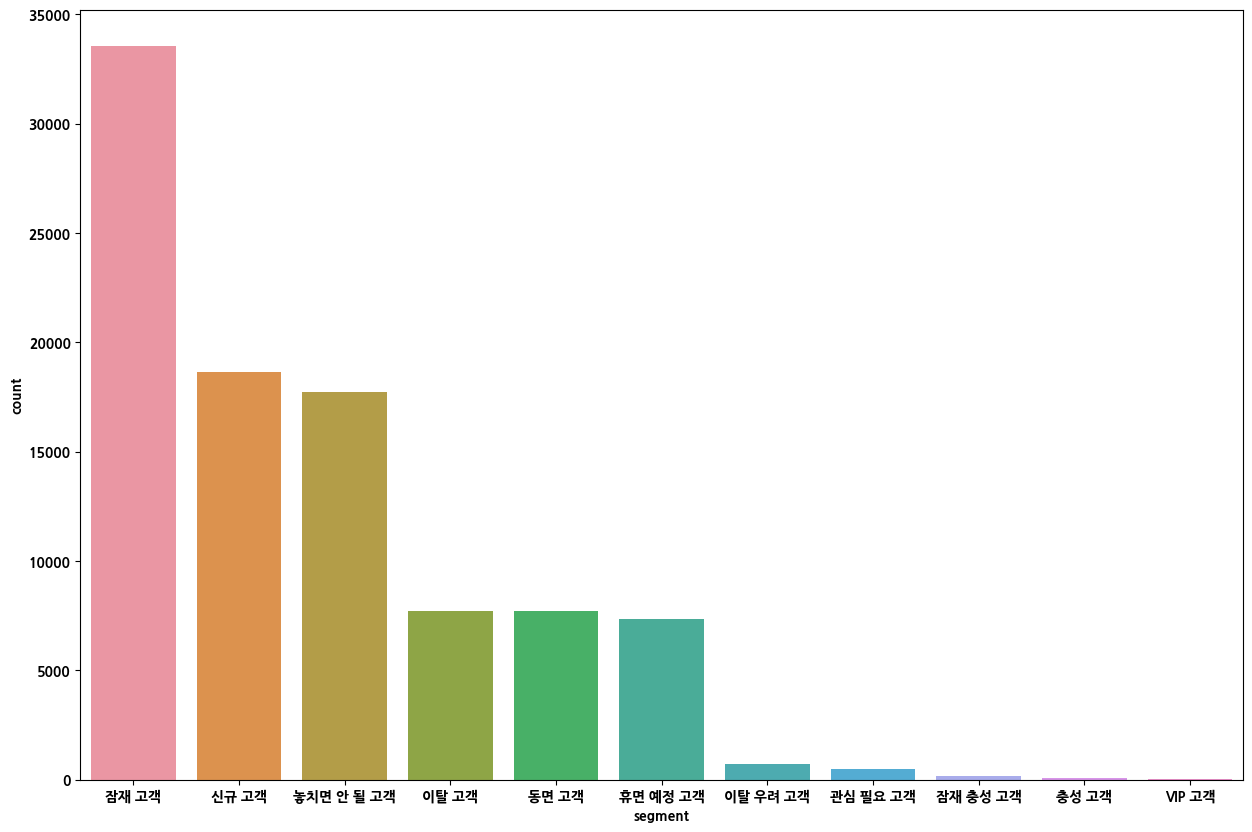

In [48]:
plt.figure(figsize=(15, 10))
seg = data.groupby('segment')['customer_unique_id'].nunique().reset_index().sort_values(by = 'customer_unique_id', ascending = False)
seg.rename(columns = {'customer_unique_id' : 'count'}, inplace = True)
fig = sns.barplot(seg, x = 'segment', y = 'count')
plt.show()

In [49]:
#고객등급 정렬을 위해 등급점수 열 추가
conditions = [
    data["고객등급"] == "다이아몬드",
    data["고객등급"] == "골드",
    data["고객등급"] == "실버",
    data["고객등급"] == "브론즈",
]
values = [4, 3, 2, 1]

data["등급점수"] = np.select(conditions, values, default="")

## 고객 등급별 고객 수

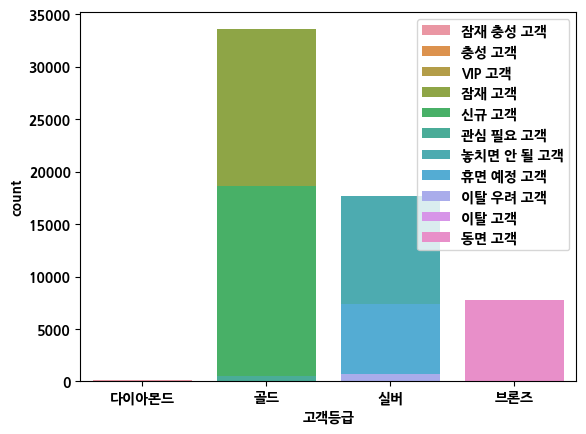

In [50]:
grade = data.groupby(['고객등급', '등급점수', 'segment'])['customer_unique_id'].nunique().reset_index().sort_values(by=['등급점수', 'customer_unique_id'], ascending = False)
grade.rename(columns = {'customer_unique_id' : 'count'}, inplace = True)
fig = sns.barplot(grade, x = '고객등급', y = 'count', hue='segment',dodge=False)
plt.legend(loc='upper right')
plt.show()

골드 등급에 해당하는 고객 수가 가장 많고, 다이아몬드 등급에 해당하는 고객 수가 가장 적음.
-> RFM 점수로는 다이아몬드 등급이 우리의 핵심 고객이 되어야 하지만 고객 수로 보면 골드 등급이 우리의 메인 타겟.


### 고객 등급별 고객 거주지 Top 10

In [51]:
# customer_city 기준으로 각 도시별 고객수 계산
city_counts = data.groupby('customer_city')['customer_unique_id'].nunique()

In [52]:
# 상위 10개 도시 추출
top_cities = city_counts.nlargest(10).index.tolist()

In [53]:
# top_cities와 고객등급을 기준으로 groupby하여 고객수 계산
groupedtopcity_df = data[data['customer_city'].isin(top_cities)].groupby(['고객등급', '등급점수', 'customer_city'])['customer_unique_id'].nunique().reset_index(name='고객수')
groupedtopcity_df = groupedtopcity_df.sort_values(by=['등급점수', '고객수'], ascending = False)

In [54]:
# 결과 확인
groupedtopcity_df

,고객등급,등급점수,customer_city,고객수
19,다이아몬드,4,sao paulo,40
16,다이아몬드,4,rio de janeiro,23
10,다이아몬드,4,belo horizonte,7
15,다이아몬드,4,porto alegre,6
17,다이아몬드,4,salvador,5
12,다이아몬드,4,campinas,4
13,다이아몬드,4,curitiba,4
11,다이아몬드,4,brasilia,3
18,다이아몬드,4,sao bernardo do campo,3
14,다이아몬드,4,guarulhos,2


In [55]:
df_list  = groupedtopcity_df['고객등급'].unique()

In [56]:
groupedtopcity_df

,고객등급,등급점수,customer_city,고객수
19,다이아몬드,4,sao paulo,40
16,다이아몬드,4,rio de janeiro,23
10,다이아몬드,4,belo horizonte,7
15,다이아몬드,4,porto alegre,6
17,다이아몬드,4,salvador,5
12,다이아몬드,4,campinas,4
13,다이아몬드,4,curitiba,4
11,다이아몬드,4,brasilia,3
18,다이아몬드,4,sao bernardo do campo,3
14,다이아몬드,4,guarulhos,2


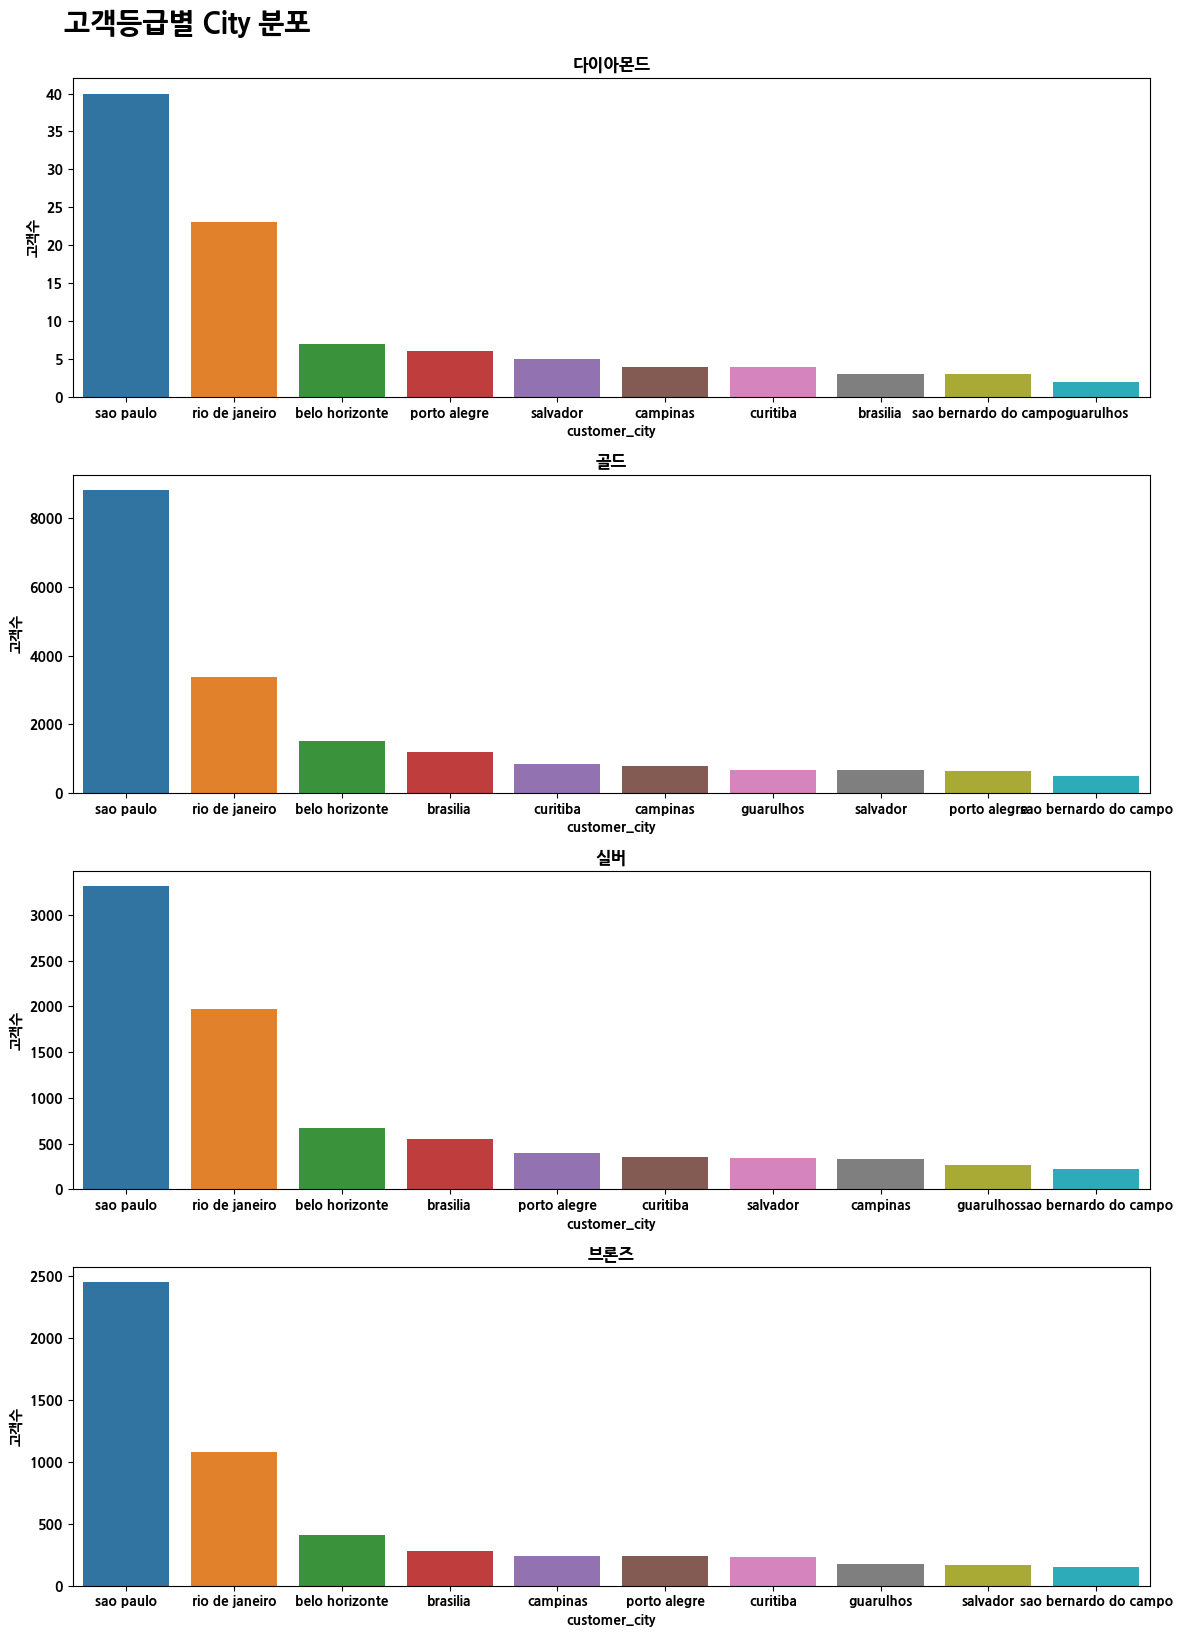

In [57]:
# 고객 등급별로 리스트 저장
df_list  = groupedtopcity_df['고객등급'].unique()
# 서브 플롯 크기설정
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# 그래프 그리기
for i, list in enumerate(df_list):
    df = groupedtopcity_df[groupedtopcity_df['고객등급'] == list].sort_values(by=["고객수"], ascending=False)
    sns.barplot(x = 'customer_city', y = '고객수', data = df, ax = axes[i])
    axes[i].set_title(list)
# 그래프 정렬
plt.tight_layout()
# 서브 플롯 타이틀 위치 지정
plt.suptitle("고객등급별 City 분포", fontsize=20,x = 0.16 , y=1.02)
# 그래프 보여주기
fig.show()

고객 등급 별로 거주 지역에 대한 뚜렷한 특징은 없음.

In [58]:
#각 등급별로 데이터 추출하여 리스트에 저장
dfs = []
for level in ['다이아몬드', '골드', '실버', '브론즈']:
    df_level = data[data['고객등급']==level]
    df_level_top5 = df_level.groupby(['고객등급', 'product_category_name'])['order_id'].count().reset_index().sort_values(by=['고객등급', 'order_id'], ascending=False).groupby('고객등급').head(5)
    dfs.append(df_level_top5)

#리스트에 저장된 데이터프레임을 하나로 합침
result_df = pd.concat(dfs)
result_df.rename(columns = {'order_id' : 'count'}, inplace = True)
result_df

,고객등급,product_category_name,count
6,다이아몬드,bed_bath_table,116
50,다이아몬드,watches_gifts,74
45,다이아몬드,sports_leisure,67
48,다이아몬드,telephony,62
28,다이아몬드,furniture_decor,60
7,골드,bed_bath_table,6281
43,골드,health_beauty,6230
15,골드,computers_accessories,4884
66,골드,sports_leisure,4861
39,골드,furniture_decor,4401


In [59]:
#리스트에 저장된 데이터프레임을 하나로 합침
result_df = pd.concat(dfs)
result_df.rename(columns = {'order_id' : 'count'}, inplace = True)
result_df

,고객등급,product_category_name,count
6,다이아몬드,bed_bath_table,116
50,다이아몬드,watches_gifts,74
45,다이아몬드,sports_leisure,67
48,다이아몬드,telephony,62
28,다이아몬드,furniture_decor,60
7,골드,bed_bath_table,6281
43,골드,health_beauty,6230
15,골드,computers_accessories,4884
66,골드,sports_leisure,4861
39,골드,furniture_decor,4401


In [60]:
#리스트에 저장된 데이터프레임을 하나로 합침
result_df = pd.concat(dfs)
result_df.rename(columns = {'order_id' : 'count'}, inplace = True)
result_df

,고객등급,product_category_name,count
6,다이아몬드,bed_bath_table,116
50,다이아몬드,watches_gifts,74
45,다이아몬드,sports_leisure,67
48,다이아몬드,telephony,62
28,다이아몬드,furniture_decor,60
7,골드,bed_bath_table,6281
43,골드,health_beauty,6230
15,골드,computers_accessories,4884
66,골드,sports_leisure,4861
39,골드,furniture_decor,4401


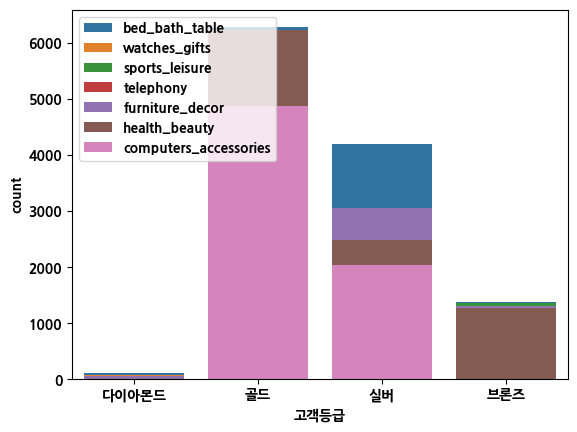

In [61]:
fig = sns.barplot(result_df, x="고객등급", y="count", hue ="product_category_name",dodge=False)
plt.legend(loc='upper left')
plt.show()

각 고객등급이 다른 등급보다 많이, 혹은 적게 구매하는 카테고리는 다음과 같이 정리할 수 있음  
다이아몬드
  
많이 구매: watches_gifts 
적게 구매: houseware, health_beuty  
골드  

많이 구매: watches_gifts, computers_accessories  
적게 구매: houseware  
실버  

많이 구매: houseware  
적게 구매: watches_gifts, telefony  
브론즈  

많이 구매: houseware  
적게 구매: watches_gifts, sports_leisure  
다이아몬드와 골드는 watches_gifts를 많이 구매  
실버와 브론즈는 houseware를 다른 등급보다 많이 구매  
골드 등급에서 computers_accessories 많이 구매  
고객 등급별 review score 평균

In [62]:
dfrvscore = data.groupby(['고객등급', '등급점수'])['review_score'].mean().reset_index(name='reviewmean').sort_values(by = '등급점수', ascending = False)
dfrvscore

,고객등급,등급점수,reviewmean
1,다이아몬드,4,4.217129
0,골드,3,3.986691
3,실버,2,3.947398
2,브론즈,1,4.155958


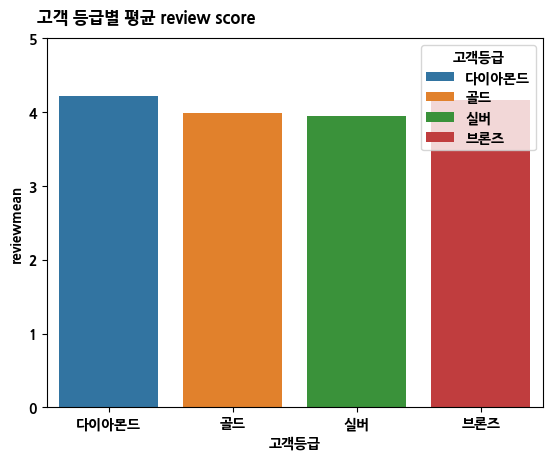

In [63]:
fig = sns.barplot(dfrvscore, x="고객등급", y="reviewmean", hue="고객등급",dodge=0)
plt.ylim(0, 5)
plt.title('고객 등급별 평균 review score', x=0.2, y = 1.02)
plt.show()

흔히 생각하기로는 다이아몬드 등급 고객의 평점이 가장 높고, 브론즈 등급 고객의 평점이 가장 낮을 것 같기만 그렇지 않음.  
골드 등급 고객과 실버 등급 고객 수가 전체의 약 80%를 차지하기 때문에 골드 등급과 실버 등급의 평균 평점이 비교적 낮은 결과가 나온 것으로 해석.  
혹은 평점 서비스가 제대로 운영이 안 되고 있는 건인지 의문.  
  
고객 등급별 결제 후 배송받지 못한 주문건 비율(주문했다가 취소한 비율)

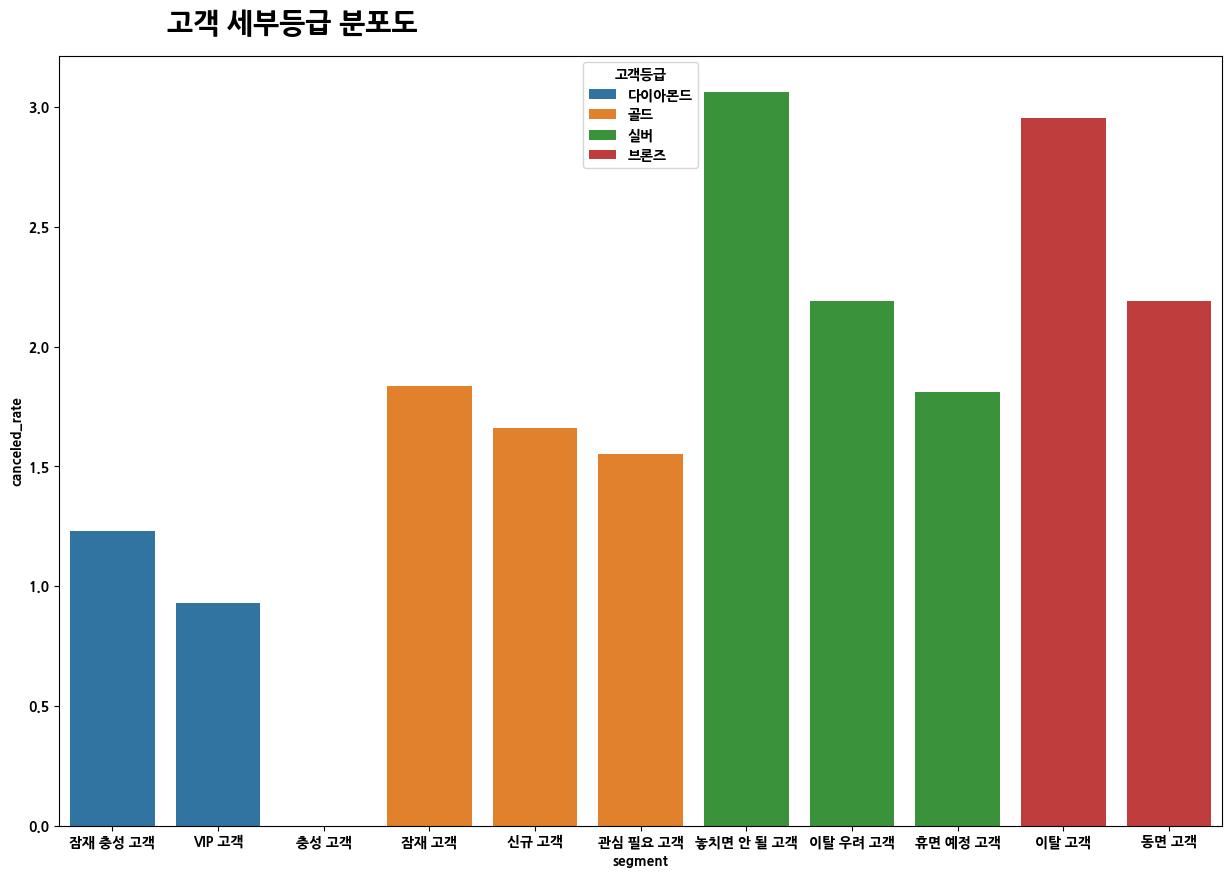

In [64]:
# -> 다이아몬드 등급에서 가장 적고 등급이 낮으면 많음

df1 = data.groupby(['고객등급', '등급점수', 'segment'])['order_delivered_customer_date'].apply(lambda x: x.isnull().mean()*100).reset_index().sort_values(by = ['등급점수', 'order_delivered_customer_date'], ascending = False)
df1.rename(columns = {'order_delivered_customer_date' : 'canceled_rate'}, inplace = True)

plt.figure(figsize = (15, 10))
fig = sns.barplot(df1, x = 'segment', y = 'canceled_rate', hue = '고객등급', dodge = 0)
plt.title('고객 세부등급 분포도', x=0.2, y = 1.02, fontsize = 20)
plt.show()

## 6. 결론
고객 세그먼테이션을 활용한 타겟 마케팅 전략 수립  
세그먼트별로 나타나는 뚜렷한 차이는 없었다.  
하지만 최근 구매 여부, 구매 빈도, 구매 금액에 따라 세그먼트를 나눴기 때문에 RFM 정도에서의 차이가 있고, 고객 등급이 높을수록 결제 후 취소하는 비율이 적다는 유의미한 결과를 얻음.  
또한 각 등급별 선호 카테고리에 맞춘 프로모션 진행, 상품 추천하는 것이 유용할 것이라는 인사이트를 얻음.  
-> 고객 세그먼트끼리 이런 차이점이 있기 때문에 세그먼트별로 다른 마케팅 방안을 적용하는 것이 좋다.  


### 고객 세그먼테이션을 활용한 타겟 마케팅 전략 수립

고객 분류|특징|마케팅 방안
|--|--|--|
|VIP 고객|최근성, 빈도, 구매 금액이 모두 가장 높은 고객|VVIP 제도 운영으로 프리미엄 서비스 제공|
|충성 고객|최근성, 빈도, 구매 금액이 모두 높은 고객|VIP 제도 운영으로 프리미엄 서비스 제공|
|잠재 충성 고객|최근 구매했고, 1번 이상 구매했으나 구매 금액이 평균 이하인 고객|마케팅 비용을 절감하는 디마케팅 전략 수립|
|신규 고객|최근 유입되어 빈도가 낮고 구매 금액이 적은 고객|웰컴 쿠폰 제공 및 크로스셀링 전략 시행|
|잠재 고객|최근 구매하고 많은 금액을 소비했으나 빈도가 낮은 고객|앱 푸쉬 마케팅 및 크로스셀링 전략 시행|
|관심 필요 고객|최근성, 빈도, 구매 금액이 모두 평균 이상인 고객|SMS/이메일 광고|
|휴면 직전 고객|최근성, 빈도, 구매 금액이 모두 평균 이하인 고객|SMS/이메일 광고|
|이탈 우려 고객|많은 금액을 소비했고, 자주 구매했으나 최근 방문하지 않은 고객|재로그인시 컴백 기념 할인 쿠폰 제공|
|놓치면 안될 고객|매우 큰 금액을 소비했거나 매우 자주 구매했으나, 최근 방문하지 않은 고객|재로그인시 컴백 기념 할인 쿠폰 제공|
|동면 고객|적은 금액을 소비했고, 방문 빈도가 낮으며, 오래 전에 방문한 고객|앱 푸쉬 마케팅|
|이탈 고객|최근성, 빈도, 구매 금액이 모두 가장 낮은 고객|앱 푸쉬 마케팅|

## 인사아트 및 팀 프로젝트 리뷰
*  CMR 기법에서 RFM 고객 세그먼트 구분을 통한 인사이트 돌출  
*  11가지의 고객 특징으로 구분하여 알맞은 마케팅 서비스를 적용하여 기업의 고객안치를 유도   
*  시각화 그래프로 보다 직관적인 특징을 보기위해 다이아, 골드, 실버, 브론즈 총 4가지 그룹으로 나눠 그래프 작성  
*  골드 그룹의 고객들의 수가 가장 많은 것을 보았으며 등급별로 그다진 확연한 특징을 돌출되지는 않았다. 하지만 고객 특성을 RFM 방식을 통해 특성을  
구분하여 효율적인 마케팅 전략을 세울 수 있을 것이라는 기대효과가 크다.